# Python 381 Project: Linan He, Ben Kluger

## In this project we analyzed vehicle accidents in NYC for the ten-year time period 2012-2022.
https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

###### Points of interest: 6 most dangerous streets in NYC, Heatmap of motor vehicle collisions over the course of March-2021, Overall map of collisions in NYC over the ten-year period, COVID-19 information at the very bottom.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap

In [3]:
data = pd.read_csv(r"Motor_Vehicle_Collisions_-_Crashes.csv") #Read in the data

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
interesting_columns = ['CRASH DATE','CRASH TIME','BOROUGH','LATITUDE', 'LONGITUDE',
        'ON STREET NAME', 'CROSS STREET NAME','NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']
data = data[interesting_columns]

In [5]:
data.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
LATITUDE                         float64
LONGITUDE                        float64
ON STREET NAME                    object
CROSS STREET NAME                 object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
dtype: object

In [7]:
data

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,04/14/2021,5:32,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,0.0,0.0,0,0,0,0,0,0
1,04/13/2021,21:35,BROOKLYN,40.683580,-73.976170,NaN,NaN,1.0,0.0,1,0,0,0,0,0
2,04/15/2021,16:15,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,0.0,0.0,0,0,0,0,0,0
3,04/13/2021,16:00,BROOKLYN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,0.0,0.0,0,0,0,0,0,0
4,04/12/2021,8:25,NaN,0.000000,0.000000,EDSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859308,07/06/2012,15:09,MANHATTAN,40.801235,-73.941815,EAST 119 STREET,PARK AVENUE,0.0,0.0,0,0,0,0,0,0
1859309,07/03/2012,17:30,QUEENS,40.774711,-73.933386,27 AVENUE,4 STREET,2.0,0.0,0,0,0,0,2,0
1859310,07/01/2012,15:30,BROOKLYN,40.645032,-73.919978,RALPH AVENUE,CLARENDON ROAD,0.0,0.0,0,0,0,0,0,0
1859311,07/08/2012,18:30,NaN,40.786122,-73.804078,NaN,NaN,0.0,0.0,0,0,0,0,0,0


In [8]:
danger = data.groupby(["ON STREET NAME", "CROSS STREET NAME", "LATITUDE", "LONGITUDE"])["NUMBER OF PERSONS INJURED"].sum() #Take the sum of the number of people injured, based on street and cross street name

In [9]:
danger.sort_values().tail(6) #This shows the streets with the highest number of people injured over the course of this dataset

ON STREET NAME                    CROSS STREET NAME                 LATITUDE   LONGITUDE 
ATLANTIC AVENUE                   LOGAN STREET                      40.680015  -73.877428     88.0
BRUCKNER BOULEVARD                EAST 138 STREET                   40.804700  -73.912430     89.0
FLATBUSH AVENUE                   EMPIRE BOULEVARD                  40.663183  -73.962449     92.0
PENNSYLVANIA AVENUE               LINDEN BOULEVARD                  40.658578  -73.890623     93.0
ROCKAWAY BOULEVARD                BREWER BOULEVARD                  40.656160  -73.767360    124.0
WEST FORDHAM ROAD                 MAJOR DEEGAN EXPRESSWAY           40.861862  -73.912820    141.0
Name: NUMBER OF PERSONS INJURED, dtype: float64

In [10]:
data[(data["NUMBER OF PEDESTRIANS INJURED"]>=1)|(data["NUMBER OF CYCLIST INJURED"]>=1)] #This shows crashes where at least one pedestrian or cyclist was injured

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
1,04/13/2021,21:35,BROOKLYN,40.683580,-73.976170,NaN,NaN,1.0,0.0,1,0,0,0,0,0
10,04/11/2021,21:06,BROOKLYN,NaN,NaN,BEVERLEY ROAD,EAST 21 STREET,1.0,0.0,1,0,0,0,0,0
43,04/13/2021,20:34,BROOKLYN,40.668495,-73.925606,EASTERN PARKWAY,BUFFALO AVENUE,1.0,0.0,1,0,0,0,0,0
51,04/15/2021,12:05,NaN,40.761436,-73.769950,BELL BOULEVARD,NaN,1.0,0.0,1,0,0,0,0,0
52,04/16/2021,11:00,QUEENS,40.749580,-73.865410,NaN,NaN,1.0,0.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859272,07/07/2012,18:40,NaN,40.867335,-73.822707,NaN,NaN,1.0,0.0,0,0,1,0,0,0
1859273,07/06/2012,13:33,BROOKLYN,40.625780,-74.024154,5 AVENUE,80 STREET,1.0,0.0,0,0,1,0,0,0
1859298,07/03/2012,15:22,BROOKLYN,40.661997,-73.919593,EAST 98 STREET,KINGS HIGHWAY,1.0,0.0,1,0,0,0,0,0
1859299,07/08/2012,15:00,QUEENS,40.767228,-73.918907,33 STREET,28 ROAD,1.0,0.0,1,0,0,0,0,0


### 6 most dangerous intersections in NYC (on street, cross street name, and the number of injured people)

In [47]:
# Make a data frame with dots to show on the map. We took the lat/long of each of those 6 streets we found above
# This saves an HTML page to your directory with the populated map
data2 = pd.DataFrame({
'lat':[40.680015,40.804700, 40.663183, 40.656160, 40.658578, 40.861862],
'lon':[-73.877428,-73.912430,-73.962449,-73.767360, -73.890623, -73.912820],
'name':['ATLANTIC AVENUE, LOGAN STREET','BRUCKNER BOULEVARD, EAST 138 STREET', 'FLATBUSH AVENUE, EMPIRE BOULEVARD', 
        'PENNSYLVANIA AVENUE, LINDEN BOULEVARD', 'ROCKAWAY BOULEVARD, BREWER BOULEVARD','WEST FORDHAM ROAD, MAJOR DEEGAN EXPRESSWAY'],
'injured people':['88', '89', '92', '93', '124', '141']})
 
# Create the empty map and then populate
map1 = folium.Map(location=[40.7127837,-74.0059413], tiles="OpenStreetMap", zoom_start=11) 

# Add marker one by one on the map
for i in range(0,6):
    folium.Marker([data2.iloc[i]['lat'], data2.iloc[i]['lon']], tooltip=data2.iloc[i]['name']+'<br> Injured people: '+data2.iloc[i]['injured people']).add_to(map1)

folium.TileLayer('Stamen Terrain').add_to(map1)
folium.LayerControl().add_to(map1)


map1.save("6_most_dangerous_intersections FINAL.html") # Save the map to your computer
map1

In [12]:
def get_hour(s):
    if type(s) == str:
        return s[0:2].replace(":", "") #Take out the first two numbers. If the second number is a ":", then just take it away
    else:
        return s;

In [13]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,04/14/2021,5:32,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,0.0,0.0,0,0,0,0,0,0
1,04/13/2021,21:35,BROOKLYN,40.68358,-73.97617,NaN,NaN,1.0,0.0,1,0,0,0,0,0
2,04/15/2021,16:15,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,0.0,0.0,0,0,0,0,0,0
3,04/13/2021,16:00,BROOKLYN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,0.0,0.0,0,0,0,0,0,0
4,04/12/2021,8:25,NaN,0.00000,0.00000,EDSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0


In [14]:
data["hour"] = data["CRASH TIME"].apply(get_hour) #making new column using our get_hour function from earlier

In [15]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,hour
0,04/14/2021,5:32,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,0.0,0.0,0,0,0,0,0,0,5
1,04/13/2021,21:35,BROOKLYN,40.68358,-73.97617,NaN,NaN,1.0,0.0,1,0,0,0,0,0,21
2,04/15/2021,16:15,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,0.0,0.0,0,0,0,0,0,0,16
3,04/13/2021,16:00,BROOKLYN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,0.0,0.0,0,0,0,0,0,0,16
4,04/12/2021,8:25,NaN,0.00000,0.00000,EDSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,8


In [16]:
data_March_2021= data[(data["CRASH DATE"].str.startswith("03/")) & (data["CRASH DATE"].str.endswith("2021"))] #Set it equal to 03/xx/2021

### Heatmap: Motor Vehicle Collisions in NYC: March, 2021

In [48]:
#Data Collisions per hour of the day, for every day in the month of 03/2021

map2 = folium.Map(location=[40.7127837,-74.0059413],
                    zoom_start = 11) 
data_March_2021 = data_March_2021[["hour","LATITUDE","LONGITUDE"]].dropna()
heat_df = data_March_2021[['LATITUDE', 'LONGITUDE']]

heat_df['Weight'] = data_March_2021['hour'].dropna()
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['LATITUDE','LONGITUDE', "Weight"])

heat_data = [[[row['LATITUDE'],row['LONGITUDE']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in range(0,24)]
hm = plugins.HeatMapWithTime(heat_data,radius = 13,auto_play=False,max_opacity=0.8)
hm.add_to(map2)


map2.save("Heatmap March-2021 FINAL.html") # Save the map to your computer
map2

In [18]:
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH DATE'].sort_values().index
df_by_date = data.iloc[data['CRASH DATE'].sort_values().index]

data.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,hour
0,2021-04-14,5:32,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,0.0,0.0,0,0,0,0,0,0,5
1,2021-04-13,21:35,BROOKLYN,40.68358,-73.97617,NaN,NaN,1.0,0.0,1,0,0,0,0,0,21
2,2021-04-15,16:15,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,0.0,0.0,0,0,0,0,0,0,16
3,2021-04-13,16:00,BROOKLYN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,0.0,0.0,0,0,0,0,0,0,16
4,2021-04-12,8:25,NaN,0.00000,0.00000,EDSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,8


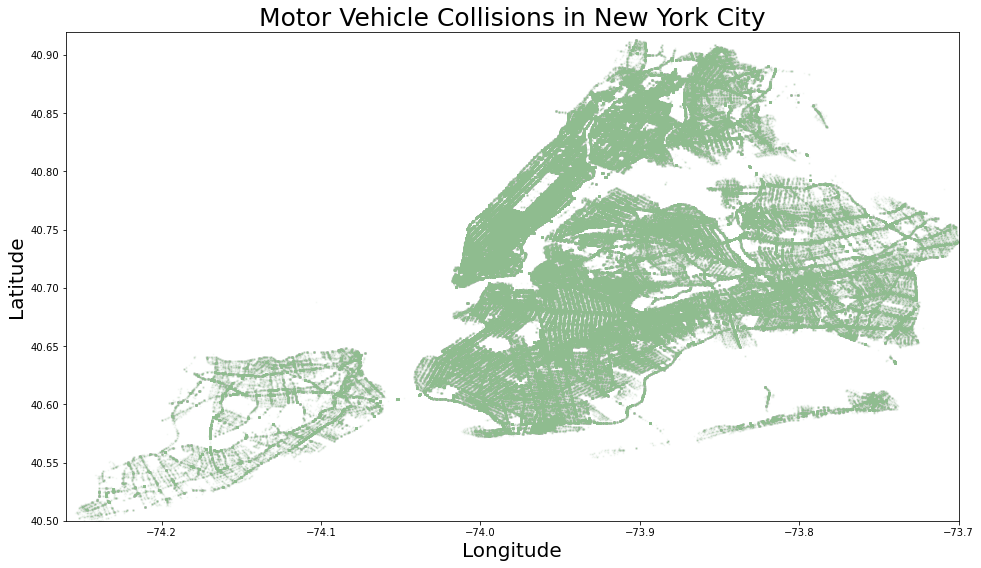

In [19]:
plt.figure(figsize=(16,9))
plt.scatter(data.LONGITUDE, data.LATITUDE, alpha=0.05, s=1, color='darkseagreen')
plt.title('Motor Vehicle Collisions in New York City', size=25)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)

plt.show()

#Notice the square cut-out for central park!

In [20]:
df_by_date = data.sort_values(['CRASH DATE'])

In [21]:
df_by_date['month'] = df_by_date['CRASH DATE'].dt.month #Set the data to the proper columns
df_by_date['hour'] = df_by_date['CRASH DATE'].dt.hour
df_by_date['year'] = df_by_date['CRASH DATE'].dt.year
df_by_date.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,hour,month,year
1855847,2012-07-01,16:00,NaN,40.876473,-73.870569,NaN,NaN,0.0,0.0,0,0,0,0,0,0,0,7,2012
1857728,2012-07-01,2:04,MANHATTAN,40.747925,-73.973607,EAST 39 STREET,2 AVENUE,1.0,0.0,1,0,0,0,0,0,0,7,2012
1855409,2012-07-01,18:00,MANHATTAN,40.784975,-73.982638,WEST 79 STREET,RIVERSIDE DRIVE,0.0,0.0,0,0,0,0,0,0,0,7,2012
1858649,2012-07-01,20:30,BRONX,40.821167,-73.907749,CAULDWELL AVENUE,EAST 160 STREET,0.0,0.0,0,0,0,0,0,0,0,7,2012
1856152,2012-07-01,22:00,BROOKLYN,40.669725,-73.860962,LINDEN BOULEVARD,DREW STREET,0.0,0.0,0,0,0,0,0,0,0,7,2012


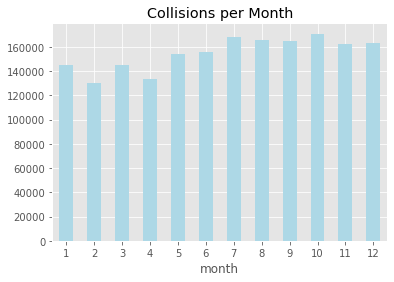

In [22]:
plt.style.use('ggplot')
collisions_by_date = df_by_date.groupby('month').size()
plt.title('Collisions per Month')
plt.xticks(rotation=90)
collisions_by_date.plot.bar(color = "lightblue")
plt.xticks(rotation=360)
plt.show()

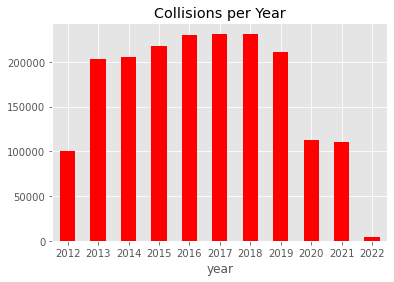

In [23]:
#This shows collisions by year. Notice how 2020-2021 have so little due to COVID!

plt.style.use('ggplot')
collisions_by_date = df_by_date.groupby('year').size()
plt.title('Collisions per Year')
plt.xticks(rotation=45)
collisions_by_date.plot.bar(color = 'red')
plt.xticks(rotation=360)
plt.show()

In [24]:
month_hour = df_by_date[['month','hour']]

In [25]:
by_borough = data.groupby('BOROUGH').sum() #Group by the sum of information by borough
by_borough.reset_index(inplace=True)

Text(0.5, 1.0, 'Number of people injured by Borough')

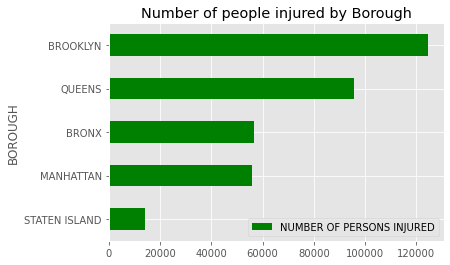

In [26]:
plt.style.use('ggplot')
by_borough.sort_values('NUMBER OF PERSONS INJURED').plot.barh(x='BOROUGH',y='NUMBER OF PERSONS INJURED', color = "green")
plt.title('Number of people injured by Borough')

Text(0.5, 1.0, 'Number of people killed by Borough')

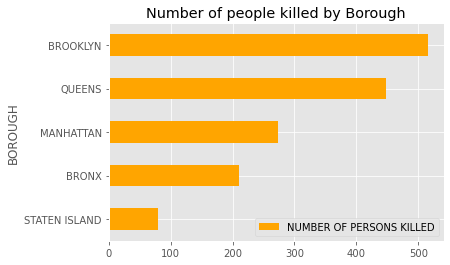

In [27]:
plt.style.use('ggplot')
by_borough.sort_values('NUMBER OF PERSONS KILLED').plot.barh(x='BOROUGH',y='NUMBER OF PERSONS KILLED', color = "orange")
plt.title('Number of people killed by Borough')

Text(0.5, 1.0, 'Number of pedestrians injured by Borough')

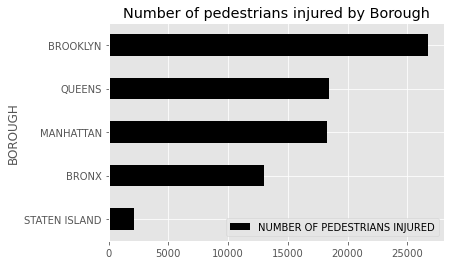

In [28]:
plt.style.use('ggplot')
by_borough.sort_values('NUMBER OF PEDESTRIANS INJURED').plot.barh(x='BOROUGH',y='NUMBER OF PEDESTRIANS INJURED', color = "black")
plt.title('Number of pedestrians injured by Borough')

Text(0.5, 1.0, 'Number of pedestrians killed by Borough')

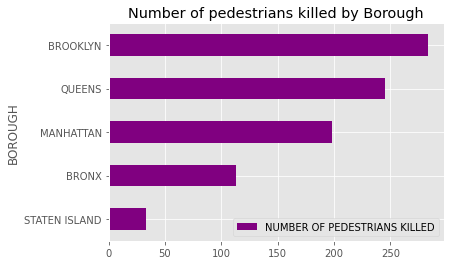

In [29]:
plt.style.use('ggplot')
by_borough.sort_values('NUMBER OF PEDESTRIANS KILLED').plot.barh(x='BOROUGH',y='NUMBER OF PEDESTRIANS KILLED', color = "purple")
plt.title('Number of pedestrians killed by Borough')

In [30]:
data = data[interesting_columns]
data

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,2021-04-14,5:32,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,0.0,0.0,0,0,0,0,0,0
1,2021-04-13,21:35,BROOKLYN,40.683580,-73.976170,NaN,NaN,1.0,0.0,1,0,0,0,0,0
2,2021-04-15,16:15,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,0.0,0.0,0,0,0,0,0,0
3,2021-04-13,16:00,BROOKLYN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,0.0,0.0,0,0,0,0,0,0
4,2021-04-12,8:25,NaN,0.000000,0.000000,EDSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859308,2012-07-06,15:09,MANHATTAN,40.801235,-73.941815,EAST 119 STREET,PARK AVENUE,0.0,0.0,0,0,0,0,0,0
1859309,2012-07-03,17:30,QUEENS,40.774711,-73.933386,27 AVENUE,4 STREET,2.0,0.0,0,0,0,0,2,0
1859310,2012-07-01,15:30,BROOKLYN,40.645032,-73.919978,RALPH AVENUE,CLARENDON ROAD,0.0,0.0,0,0,0,0,0,0
1859311,2012-07-08,18:30,NaN,40.786122,-73.804078,NaN,NaN,0.0,0.0,0,0,0,0,0,0


In [31]:
danger = data.groupby(["BOROUGH"])["NUMBER OF PERSONS INJURED"].sum()
danger

BOROUGH
BRONX             56553.0
BROOKLYN         124322.0
MANHATTAN         55789.0
QUEENS            95594.0
STATEN ISLAND     14339.0
Name: NUMBER OF PERSONS INJURED, dtype: float64

In [32]:
danger = data.groupby(["BOROUGH"])["NUMBER OF PERSONS KILLED"].sum()
danger

BOROUGH
BRONX            211.0
BROOKLYN         515.0
MANHATTAN        274.0
QUEENS           448.0
STATEN ISLAND     79.0
Name: NUMBER OF PERSONS KILLED, dtype: float64

In [33]:
danger = data.groupby(["BOROUGH"])["NUMBER OF PEDESTRIANS INJURED"].sum()
danger

BOROUGH
BRONX            13025
BROOKLYN         26703
MANHATTAN        18311
QUEENS           18420
STATEN ISLAND     2098
Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64

In [34]:
danger = data.groupby(["BOROUGH"])["NUMBER OF PEDESTRIANS KILLED"].sum()
danger

BOROUGH
BRONX            113
BROOKLYN         283
MANHATTAN        198
QUEENS           245
STATEN ISLAND     33
Name: NUMBER OF PEDESTRIANS KILLED, dtype: int64

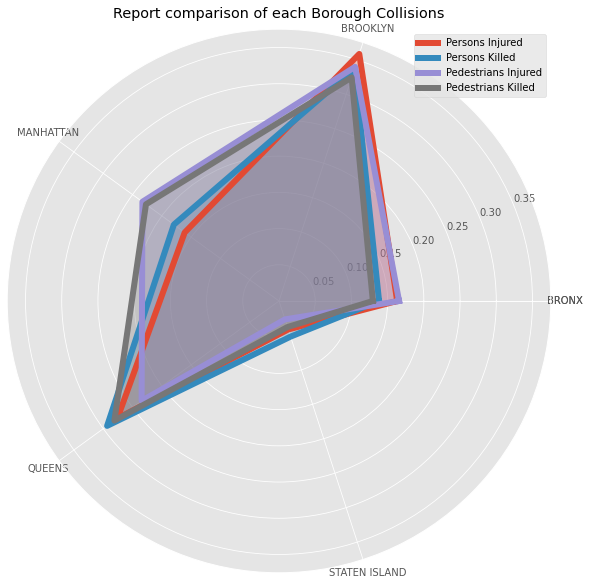

In [36]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,polar=True)
#values in ratio
values_persons_injured = [56553/346597,124322/346597,55789/346597,95594/346597,14339/346597,56553/346597]
values_persons_killed = [211/1527,515/1527,274/1527,448/1527,79/1527,211/1527]
values_prdestrians_injured = [13025/78557,26703/78557,18311/78557,18420/78557,2098/78557,13025/78557]
values_prdestrians_killed = [113/872,283/872,198/872,245/872,33/872,113/872]

angles = np.linspace(0,2*np.pi,len(values_persons_injured))
categories = ['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND','BRONX']

#Graph for each brough
ax.plot(angles,values_persons_injured,linewidth=6,label='Persons Injured')
ax.fill(angles,values_persons_injured,alpha=.3)

ax.plot(angles,values_persons_killed,linewidth=6,label="Persons Killed")
ax.fill(angles,values_persons_killed,alpha=.3)

ax.plot(angles,values_prdestrians_injured,linewidth=6,label="Pedestrians Injured")
ax.fill(angles,values_prdestrians_injured,alpha=.3)

ax.plot(angles,values_prdestrians_killed,linewidth=6,label="Pedestrians Killed")
ax.fill(angles,values_prdestrians_killed,alpha=.3)


ax.set_title('Report comparison of each Borough Collisions')
ax.set_xticks(angles)

 
ax.set_xticklabels(categories)
ax.legend()

plt.show()



------------------------------------------

# COVID-19 Cases in NYC 2020-2021
https://data.cityofnewyork.us/Health/COVID-19-Daily-Counts-of-Cases-Hospitalizations-an/rc75-m7u3

------------------------------------------

In [50]:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [51]:
address = r"COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv"
df = pd.read_csv(address, usecols = ['DATE_OF_INTEREST', 'CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'BX_CASE_COUNT', 'BX_HOSPITALIZED_COUNT', 'BX_DEATH_COUNT', 'BK_CASE_COUNT', 'BK_HOSPITALIZED_COUNT', 'BK_DEATH_COUNT', 'MN_CASE_COUNT','MN_HOSPITALIZED_COUNT', 'MN_DEATH_COUNT', 'QN_CASE_COUNT', 'QN_HOSPITALIZED_COUNT', 'QN_DEATH_COUNT', 'SI_CASE_COUNT', 'SI_HOSPITALIZED_COUNT', 'SI_DEATH_COUNT'], index_col = 'DATE_OF_INTEREST')
dfCase = pd.read_csv(address, usecols =['DATE_OF_INTEREST', 'CASE_COUNT','BX_CASE_COUNT','BK_CASE_COUNT','MN_CASE_COUNT','QN_CASE_COUNT','SI_CASE_COUNT'])
dfHospital = pd.read_csv(address, usecols =['DATE_OF_INTEREST', 'HOSPITALIZED_COUNT','BX_HOSPITALIZED_COUNT','BK_HOSPITALIZED_COUNT','MN_HOSPITALIZED_COUNT','QN_HOSPITALIZED_COUNT','SI_HOSPITALIZED_COUNT'], index_col = 'DATE_OF_INTEREST')
dfDeath = pd.read_csv(address, usecols =['DATE_OF_INTEREST', 'DEATH_COUNT','BX_DEATH_COUNT','BK_DEATH_COUNT','MN_DEATH_COUNT','QN_DEATH_COUNT','SI_DEATH_COUNT'], index_col = 'DATE_OF_INTEREST')

df.head()
dfCase.head()
dfHospital.head()
dfDeath.head()
df

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_HOSPITALIZED_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT
DATE_OF_INTEREST,,,,,,,,,,,,,,,,,,
02/29/2020,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
03/01/2020,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
03/02/2020,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
03/03/2020,1,7,0,0,1,0,0,3,0,0,1,0,1,2,0,0,0,0
03/04/2020,5,2,0,0,0,0,1,1,0,2,1,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01/12/2022,17258,678,100,2801,142,19,5329,201,36,2975,116,20,5070,187,21,1080,37,4
01/13/2022,14331,609,88,2286,140,12,4502,175,26,2189,114,18,4416,151,27,938,33,5
01/14/2022,11807,491,81,1997,158,21,3654,159,18,1996,91,15,3403,78,23,756,9,4


In [53]:
fig = plt.figure(figsize=(10,10))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

heatmap = sb.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
heatmap.show()

TypeError: 'module' object is not callable

<AxesSubplot:xlabel='DATE_OF_INTEREST'>

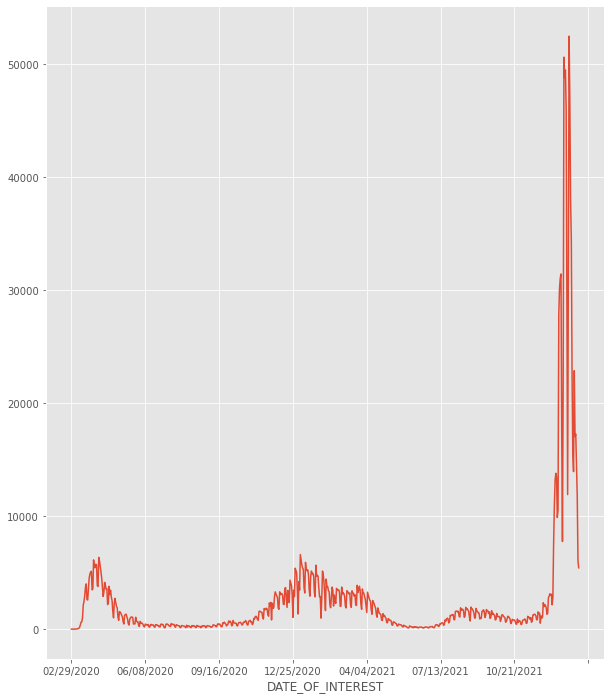

In [45]:
df['CASE_COUNT'].plot(figsize=(10,12))

array([<AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>,
       <AxesSubplot:xlabel='DATE_OF_INTEREST'>], dtype=object)

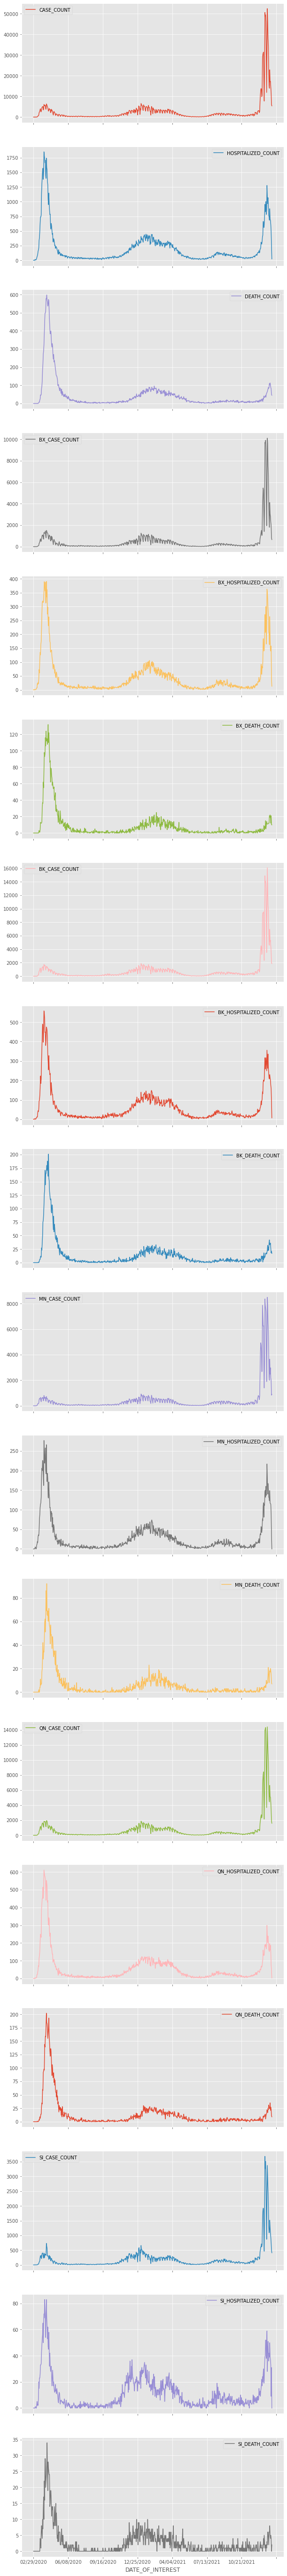

In [42]:
df.plot(subplots=True,figsize=(10,100))